# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='once')


# Reading the Dataset

In [2]:
#Loading the dataset
df = pd.read_csv('https://query.data.world/s/pmwy5jqyutp5kv5ovzdoclfgvm6n2o')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 32)

# Cleaning the Dataset

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [5]:
df.isna().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
dtype: int64

In [6]:
# Fraud vs Non Fraud Transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

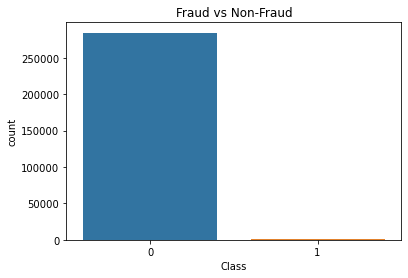

In [7]:
#Fraud vs Non-Fraudulent Transactions
sns.countplot(x='Class',data=df)
plt.title('Fraud vs Non-Fraud')
plt.show()

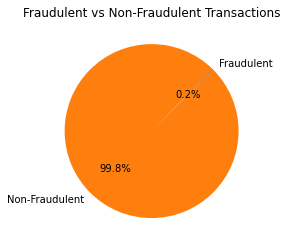

In [8]:
df2 = pd.DataFrame(df['Class'].value_counts())

#Calculate the total number of transactions
total_transactions = df2['Class'].sum()

#Calculate the percentage of fraudulent and non-fraudulent transactions
fraudulent_percentage = (df2.loc[1, 'Class']/total_transactions)*100
non_fraudulent_percentage = (df2.loc[0, 'Class']/total_transactions)*100

#Create a list of labels
labels = ['Fraudulent', 'Non-Fraudulent']

#Create a list of values
sizes = [fraudulent_percentage, non_fraudulent_percentage]

#Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow = False, startangle = 45)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Splitting Dataset

In [9]:
#Training the Model
#splitting the dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

# Algorithms

# Logistic Regression Model

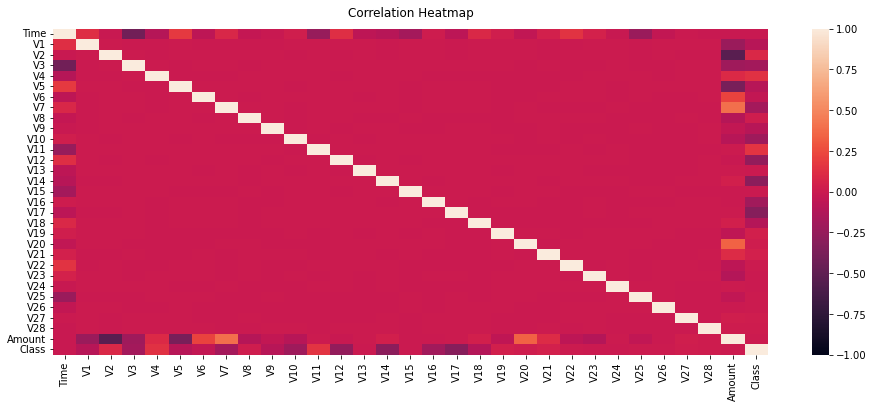

In [10]:
#Plotting correlation heatmap
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### V4, V8, V13, V15, V22, V23, V24, V25 and V26 are excluded for having no meaningful correlation

In [11]:
#Taking full model -- all independent varialbles
X= df.loc[:, df.columns != 'Class']
y= df['Class']
  
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)

In [12]:
model1a = LogisticRegression(solver='liblinear', random_state=0)
model1a.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
model1a.score(X_test,y_test)

0.9988202578579254

In [14]:
y_pred = model1a.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[71034    38]
 [   46    84]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71072
           1       0.69      0.65      0.67       130

    accuracy                           1.00     71202
   macro avg       0.84      0.82      0.83     71202
weighted avg       1.00      1.00      1.00     71202



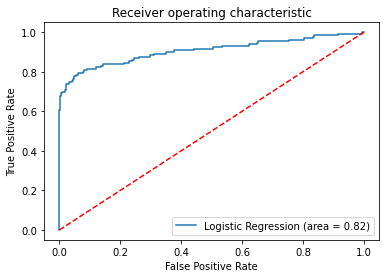

In [16]:
logit_roc_auc = roc_auc_score(y_test, model1a.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1a.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [17]:
#V4, V8, V13, V15, V22, V23, V24, V25 and V26 are excluded for having no meaningful correlation according to above correlation heatmap
#Creating model by omitting above variables
X2= df.loc[:, ~df.columns.isin(['V4','V8','V13','V15','V22','V23','V24','V25','V26'])]
y2= df['Class']
  
# using the train test split function
X2_train, X2_test,y2_train, y2_test = train_test_split(X2,y2 ,random_state=104, test_size=0.25, shuffle=True)

In [18]:
model1b = LogisticRegression(solver='liblinear', random_state=0)
model1b.fit(X2_train,y2_train)

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
model1b.score(X2_test,y2_test)
lr_accuracy = model1b.score(X2_test,y2_test)
lr_accuracy = round(lr_accuracy.mean()*100,2)
lr_accuracy

99.88

In [20]:
from sklearn.metrics import confusion_matrix

y2_pred = model1b.predict(X2_test)
confusion_matrix = confusion_matrix(y2_test, y2_pred)
print(confusion_matrix)

[[71033    39]
 [   45    85]]


In [21]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71072
           1       0.69      0.65      0.67       130

    accuracy                           1.00     71202
   macro avg       0.84      0.83      0.83     71202
weighted avg       1.00      1.00      1.00     71202



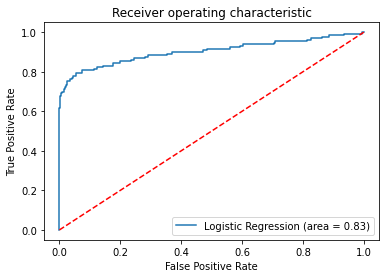

In [22]:
logit_roc_auc = roc_auc_score(y2_test, model1b.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, model1b.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree Classifier

In [23]:
#Training the Decision Tree Classifier model
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train,y_train)

#Evaluating the model
score = cross_val_score(model2,X_train,y_train,cv=5)
dt_accuracy = round(score.mean()*100,2)
print('Accuracy of the Decision Tree Classifier model is :', dt_accuracy)



Accuracy of the Decision Tree Classifier model is : 99.91


In [24]:
from sklearn.metrics import confusion_matrix


pred = model2.predict(X_test)
model2_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print()
print(f"CLASSIFICATION REPORT:\n{model2_report}")
print()
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999494    0.752000  0.999059      0.875747      0.999042
recall         0.999564    0.723077  0.999059      0.861320      0.999059
f1-score       0.999529    0.737255  0.999059      0.868392      0.999050
support    71072.000000  130.000000  0.999059  71202.000000  71202.000000

Confusion Matrix: 
 [[71041    31]
 [   36    94]]



# Random Forest Classifier

In [25]:
#Training the Random Forest Classifier model

model3 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model3.fit(X_train, y_train)

#Evaluating the model
scorerf = cross_val_score(model3,X_train,y_train,cv=5)
rf_accuracy = round(scorerf.mean()*100,2)
print('Accuracy of the Random Forest Classifier model is :',rf_accuracy)



Accuracy of the Random Forest Classifier model is : 99.96


In [26]:
from sklearn.metrics import confusion_matrix

pred = model3.predict(X_test)
model3_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print()
print(f"CLASSIFICATION REPORT:\n{model3_report}")
print()
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999508    0.950000  0.999438      0.974754      0.999417
recall         0.999930    0.730769  0.999438      0.865349      0.999438
f1-score       0.999719    0.826087  0.999438      0.912903      0.999402
support    71072.000000  130.000000  0.999438  71202.000000  71202.000000

Confusion Matrix: 
 [[71067     5]
 [   35    95]]



# Artificial Neural Network

In [39]:
# from keras import Sequential
# from keras.layers import Dense, Dropout
# import pandas as pd
# from sklearn.model_selection import train_test_split

main_data = pd.read_csv('https://query.data.world/s/pmwy5jqyutp5kv5ovzdoclfgvm6n2o') #provide path

main_data.info()
main_data['Class'].value_counts()
# main_data.head()


#Due to unbalanced data is highly vulnerable to overfitting we need to balance it
#We are using undersampling method to balance the data
fraud_data = main_data[main_data['Class']==1]
real_data = main_data[main_data['Class']==0].sample(fraud_data.shape[0])

bal_data = real_data.append(fraud_data)


#Spliting the main data in training and test data
input_cols = bal_data.drop(columns=['Class'], axis=1)
target_col = bal_data['Class']

input_cols_train, input_cols_test, target_col_train, target_col_test =  train_test_split(input_cols, target_col, test_size=0.20, random_state=2, stratify=target_col)


#Model Creation
model = Sequential()
model.add(Dense(16, input_dim=31, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

#Model Fitting
model.fit(input_cols_train, target_col_train, epochs=150)

#Model Evaluation
acc = model.evaluate(input_cols_test, target_col_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

C:\Users\visha\AppData\Local\Temp\ipykernel_15280\3559822264.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = real_data.append(fraud_data)


25/25 [==============================] - 1s 1ms/step - loss: 2040.1882 - accuracy: 0.5006
Epoch 2/150
25/25 [==============================] - 0s 961us/step - loss: 337.2814 - accuracy: 0.5044
Epoch 3/150
25/25 [==============================] - 0s 959us/step - loss: 152.7932 - accuracy: 0.5502
Epoch 4/150
25/25 [==============================] - 0s 875us/step - loss: 65.4214 - accuracy: 0.5311
Epoch 5/150
25/25 [==============================] - 0s 917us/step - loss: 72.8295 - accuracy: 0.5527
Epoch 6/150
25/25 [==============================] - 0s 940us/step - loss: 53.4316 - accuracy: 0.5337
Epoch 7/150
25/25 [==============================] - 0s 875us/step - loss: 52.3144 - accuracy: 0.5388
Epoch 8/150
25/25 [==============================] - 0s 917us/step - loss: 52.9395 - accuracy: 0.5527
Epoch 9/150
25/25 [==============================] - 0s 960us/step - loss: 32.1925 - accuracy: 0.5654
Epoch 10/150
25/25 [==============================] - 0s 858us/step - loss: 22.3843 - accura

25/25 [==============================] - 0s 875us/step - loss: 9.3214 - accuracy: 0.7395
Epoch 81/150
25/25 [==============================] - 0s 917us/step - loss: 18.3980 - accuracy: 0.7065
Epoch 82/150
25/25 [==============================] - 0s 834us/step - loss: 34.4450 - accuracy: 0.6620
Epoch 83/150
25/25 [==============================] - 0s 917us/step - loss: 25.4635 - accuracy: 0.6938
Epoch 84/150
25/25 [==============================] - 0s 875us/step - loss: 22.0820 - accuracy: 0.7001
Epoch 85/150
25/25 [==============================] - 0s 833us/step - loss: 6.1803 - accuracy: 0.7611
Epoch 86/150
25/25 [==============================] - 0s 875us/step - loss: 10.3312 - accuracy: 0.7497
Epoch 87/150
25/25 [==============================] - 0s 883us/step - loss: 15.0018 - accuracy: 0.7306
Epoch 88/150
25/25 [==============================] - 0s 959us/step - loss: 10.7204 - accuracy: 0.7433
Epoch 89/150
25/25 [==============================] - 0s 834us/step - loss: 15.9075 - ac

In [43]:
ann_accuracy = round(acc[-1]*100,2)
ann_accuracy

79.7

# Gradient Boosting Classifier

In [45]:
#Training the Gradient Boosting model
model5 = GradientBoostingClassifier()
model5.fit(X_train,y_train)

#Evaluating the model
score = cross_val_score(model5,X_train,y_train,cv=5)
gb_accuracy = round(score.mean()*100,2)
print('Accuracy of the Gradient Boosting Classifier model is :',gb_accuracy)



Accuracy of the Gradient Boosting Classifier model is : 99.88


In [46]:
from sklearn.metrics import confusion_matrix

pred = model5.predict(X_test)
model5_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print()
print(f"CLASSIFICATION REPORT:\n{model5_report}")
print()
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.998356    0.333333  0.997992      0.665845      0.997142
recall         0.999634    0.100000  0.997992      0.549817      0.997992
f1-score       0.998995    0.153846  0.997992      0.576420      0.997452
support    71072.000000  130.000000  0.997992  71202.000000  71202.000000

Confusion Matrix: 
 [[71046    26]
 [  117    13]]



# Comparison of the Algorithms

C:\Users\visha\AppData\Local\Temp\ipykernel_15280\1934608860.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)


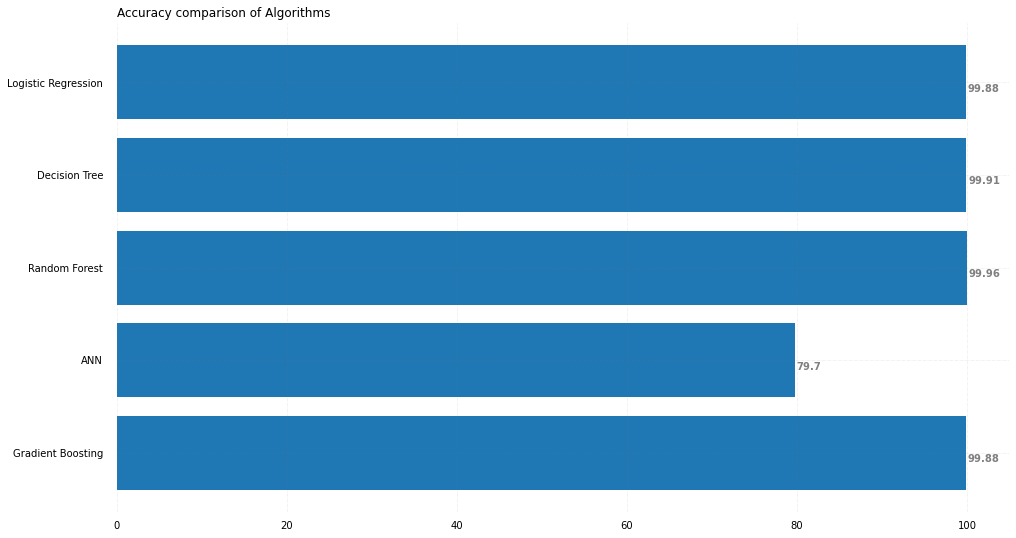

In [47]:
labels = ['Logistic Regression','Decision Tree', 'Random Forest', 'ANN', 'Gradient Boosting']

#Creating a list of accuracies for each algorithm
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, ann_accuracy, gb_accuracy]

#Creating the chart


fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(labels, accuracies)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')
 
# Add Plot Title
ax.set_title('Accuracy comparison of Algorithms', loc ='left', )
 
# Show Plot
plt.show()